# Problem 8

1. The other file in the folder, nytimes.csv is a classical PCA dataset. 
1. The first row in this file is a list of words that appear in a collection of NY times articles
    1. Except the very first entry, which is a label for the first column
1. The first column is a set of labels, ”art” or ”music,” indicating the subject of the articles. 
1. Each row of the file contains the count of how many times the corresponding word appears in the corresponding article. 
1. Use PCA to draw a low-dimensional scatter plot of this data where points are colored by the type of article. 

1. Does this provide a good separation of the article types?
    1. If you don’t think so, it may help to normalize your data in some way, as PCA is not scale invariant. 
    1. Can you find a reasonable normalization of the data that makes you happy with the separation of the different article types? 
    1. Here, the word normalization means scaling the various sensor values in a way that keeps some sensors from drowning others out.
    1. And reasonable means that you can justify the choice of normalization in terms of the type of data, rather than because it gives you the right answer. 
    1. Ideally, have a good justification before you check that it works.

## Imports And Globals

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.pyplot import scatter

DATA_DIR='/data/udel-ms-data-science/math-637'
NYTIMES='nytimes.csv'

In [2]:
nytimes_df = pd.read_csv(f'{DATA_DIR}/{NYTIMES}')

In [14]:
col_names = nytimes_df.columns.tolist()

In [12]:
nytimes_df.iloc[nytimes_df[(nytimes_df.isnull().sum(axis=1) >= 1)].index]

,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,abc,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu


### Create DataFrame With Indices

1. Original dataframe has the label
1. Extract out (x,y) using pca components using dot product of each row
1. Mate the label back to each (x,y) and then use that to color each point in scatterplot

Len of eigenvector 4431
First eigenvector
[8.7411e-02 2.0885e-05 1.0965e-03 ... 2.9859e-04 3.0140e-04 2.3125e-04]
First eigenvalue          : 506.7180
Explained Variance Ratio  : 0.6364
Sum of explained variance : 0.6831776217393166
Type of x <class 'pandas.core.series.Series'>


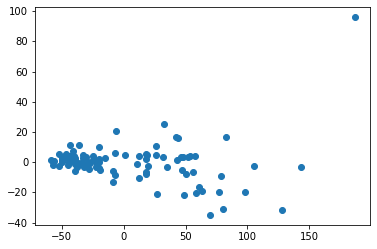

In [21]:
np.set_printoptions(precision=4,floatmode='fixed')

df=nytimes_df[col_names[1:]]
df=df-df.mean(axis=0)

pca = PCA(n_components=2)
pca.fit(df)

print(f'Len of eigenvector {len(pca.components_[0])}')
print(f'First eigenvector')
print(f'{pca.components_[0]}')

print(f'First eigenvalue          : {pca.singular_values_[0]:0.4f}')
print(f'Explained Variance Ratio  : {pca.explained_variance_ratio_[0]:0.4f}')
print(f'Sum of explained variance : {sum(pca.explained_variance_ratio_)}')

np.set_printoptions()

x=df.dot(pca.components_[0])
y=df.dot(pca.components_[1])

print(f'Type of x {type(x)}')
scatter(x,y)